In [1]:
import pandas as pd
import numpy as np
import re
import os
from datetime import datetime

import matplotlib.pyplot as plt

from keras.models import load_model

Using TensorFlow backend.


In [0]:
X = np.load("suspended_robot_X_data.npy",allow_pickle=True)
Y = np.load("suspended_robot_Y_data.npy",allow_pickle=True)

In [3]:
X.shape, Y.shape

((110592, 6), (110592, 4))

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.7,test_size=0.3,random_state=100,shuffle=True)

In [6]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((77414, 6), (77414, 4), (33178, 6), (33178, 4))

In [0]:
def plot_error(y_true,y_pred):
    error0 = y_true[:,0] - y_pred[:,0]
    error1 = y_true[:,1] - y_pred[:,1]
    error2 = y_true[:,2] - y_pred[:,2]
    error3 = y_true[:,3] - y_pred[:,3]
    fig, ax = plt.subplots(nrows=1,ncols=4,figsize=(20,5),sharex=True,sharey=True)
    ax[0].plot(y_true[:,0],error0,"r+",markersize=1)
    ax[0].set_title("Theta 0 : True Value Vs Error")
    ax[0].set_xlabel("Theta 0 (True Value)")
    ax[0].set_ylabel("Theta 0 (Prediction Error)")
    ax[1].plot(y_true[:,1],error1,"r+",markersize=1)
    ax[1].set_title("Theta 1 : True Value Vs Error")
    ax[1].set_xlabel("Theta 1 (True Value)")
    ax[1].set_ylabel("Theta 1 (Prediction Error)")
    ax[2].plot(y_true[:,2],error2,"r+",markersize=1)
    ax[2].set_title("Theta 2 : True Value Vs Error")
    ax[2].set_xlabel("Theta 2 (True Value)")
    ax[2].set_ylabel("Theta 2 (Prediction Error)")
    ax[3].plot(y_true[:,3],error3,"r+",markersize=1)
    ax[3].set_title("Theta 3 : True Value Vs Error")
    ax[3].set_xlabel("Theta 3 (True Value)")
    ax[3].set_ylabel("Theta 3 (Prediction Error)")
    plt.show()

In [0]:
def plot_error_dist(y_true,y_pred):
    error0 = y_true[:,0] - y_pred[:,0]
    error1 = y_true[:,1] - y_pred[:,1]
    error2 = y_true[:,2] - y_pred[:,2]
    error3 = y_true[:,3] - y_pred[:,3]
    fig, ax = plt.subplots(nrows=1,ncols=4,figsize=(20,5),sharex=False,sharey=False)
    ax[0].hist(error0,bins=100)
    ax[0].set_title("Theta 0 : Error Dist")
    ax[0].set_xlabel("Theta 0")
    ax[1].hist(error1,bins=100)
    ax[1].set_title("Theta 1 : Error Dist")
    ax[1].set_xlabel("Theta 1")
    ax[2].hist(error2,bins=100)
    ax[2].set_title("Theta 2 : Error Dist")
    ax[2].set_xlabel("Theta 2")
    ax[3].hist(error3,bins=100)
    ax[3].set_title("Theta 3 : Error Dist")
    ax[3].set_xlabel("Theta 3")
    plt.show()

In [9]:
model = load_model("_model-00004-0.00257-0.00157.h5")

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               700       
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 255       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 24        
Total params: 6,029
Trainable params: 6,029
Non-trainable params: 0
_________________________________________________________________


In [0]:
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

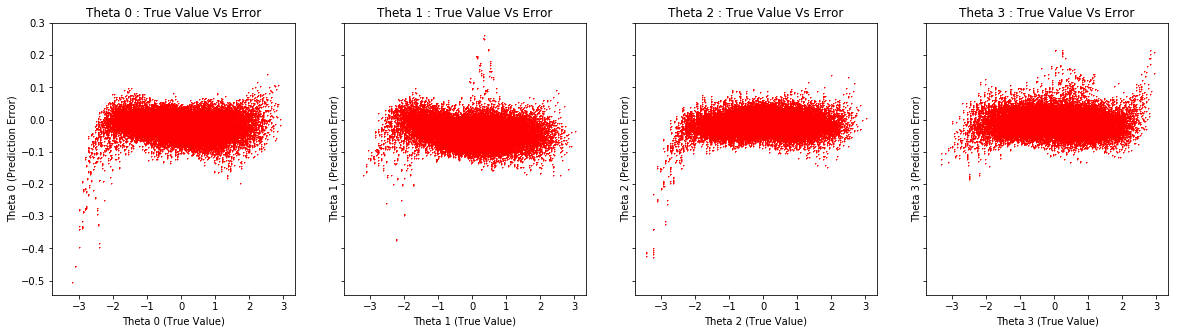

In [29]:
plot_error(Y_test,Y_test_pred)

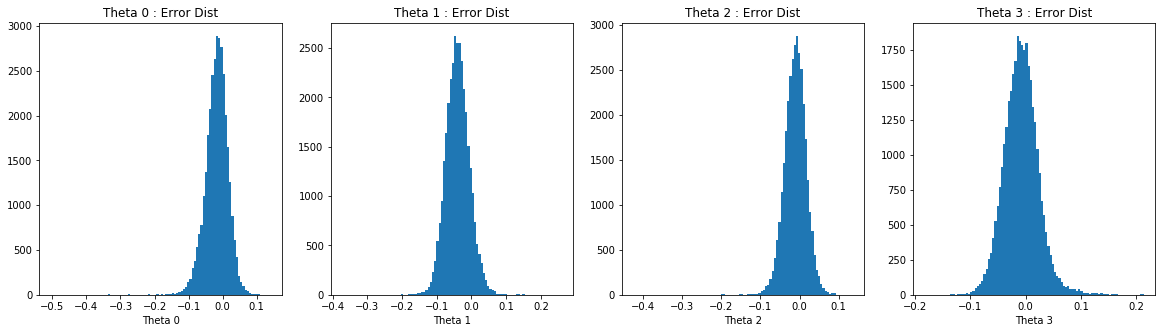

In [31]:
plot_error_dist(Y_test,Y_test_pred)

In [0]:
from sklearn.metrics import r2_score

In [11]:
print("train performance")
print("Theta0 : %f\n\
Theta1 : %f\n\
Theta2 : %f\n\
Theta3 : %f" %(r2_score(Y_train[:,0],Y_train_pred[:,0]),
               r2_score(Y_train[:,1],Y_train_pred[:,1]),
               r2_score(Y_train[:,2],Y_train_pred[:,2]),
               r2_score(Y_train[:,3],Y_train_pred[:,3])))

train performance
Theta0 : 0.998537
Theta1 : 0.997250
Theta2 : 0.999059
Theta3 : 0.998946


In [12]:
print("test performance")
print("Theta0 : %f\n\
Theta1 : %f\n\
Theta2 : %f\n\
Theta3 : %f" %(r2_score(Y_test[:,0],Y_test_pred[:,0]),
               r2_score(Y_test[:,1],Y_test_pred[:,1]),
               r2_score(Y_test[:,2],Y_test_pred[:,2]),
               r2_score(Y_test[:,3],Y_test_pred[:,3])))

test performance
Theta0 : 0.998537
Theta1 : 0.997244
Theta2 : 0.999046
Theta3 : 0.998928
